<a href="https://colab.research.google.com/github/SamuelBFG/ga-fading/blob/main/GA_KappaMu_ParameterEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r '/content/plots'

rm: cannot remove '/content/plots': No such file or directory


In [2]:
from scipy import special as sp
from scipy.stats import gaussian_kde
import random
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'figure.max_open_warning': 0})
# np.seterr(all='raise')

### PARAMETERS
nGenerations = 500
nPopulation = 1000
kappa = 1
mu = 4
r_hat = 1
numSamples = 80 # number of generated samples
numSim = 10**6 # number of gaussian points
theta = [kappa, mu, r_hat]
savePlots = True
showPlots = True

In [3]:
class KappaMu():
  '''
  KappaMu fading distribution Class
  '''
  def __init__(self, kappa, mu, r_hat, numSamples, numSim):
    # Parameters
    self.kappa = kappa
    self.mu = mu
    self.r_hat = r_hat  
    self.numSamples = numSamples
    self.numSim = numSim

    # For simulated densities
    self.generateSamples = self.generateSamples()
    self.X, self.Y = self.envelopeDensity(self.numSamples)

  def _pdf(self, r):
    '''
    Function to calculate kappa-mu pdf.
    Equation extracted from:
    https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
    Eq. (1) with rho = R = r / r_hat
    '''

    A = (2*self.mu * ((1 + self.kappa)**((self.mu+1)/2))) \
            /((self.kappa**((self.mu - 1)/2)) * np.exp(self.mu * self.kappa))
    R = r / self.r_hat
    B = (R**self.mu) * np.exp(- self.mu*(1 + self.kappa)*(R**2))
    C = sp.iv(self.mu - 1, 2*self.mu * R * np.sqrt(self.kappa*(1 + self.kappa)))
    PDF = A * B * C / self.r_hat 
    return PDF

  def scatteredComponent(self):
    '''
    Function to calculate scattered signal component's power
    '''
  
    sigma = self.r_hat / np.sqrt( 2 * self.mu * (1+self.kappa) )
  
    return sigma

  def generateGaussians(self, mean, sigma):
    '''
    Function to generate gaussian RVs
    '''

    gaussians = np.random.default_rng().normal(mean, sigma, self.numSim)
      
    return gaussians

  def generateSamples(self):
    '''
    Function to generate complex kappa-mu fading RVs
    '''
    
    p_i, q_i = self.calculateMeans()
    sigma = self.scatteredComponent()
    
    fading = 0
    for i in range(int(self.mu)):
        X_i = self.generateGaussians(p_i, sigma)
        Y_i = self.generateGaussians(q_i, sigma)
        fading = fading + X_i**(2) + Y_i**(2)  
    return fading

  def calculateMeans(self):
    '''
    Function to calculate IQ means
    '''
  
    d2 = (self.r_hat**(2) * self.kappa)/(1 + self.kappa);
  
    p_i = np.sqrt(d2/(2*self.mu))
    q_i = np.copy(p_i)
      
    return p_i, q_i

  def envelopeDensity(self, numSamples):
    '''
    Function for returning X and Y axes for each
    densities for each simulated sample
    '''
      
    R = np.sqrt(self.generateSamples)
    kde = gaussian_kde(R)
    x = np.linspace(R.min(), R.max(), numSamples)
    y = kde(x)
    
    return x, y

====== 80 kappa-mu samples succesfully generated! ======


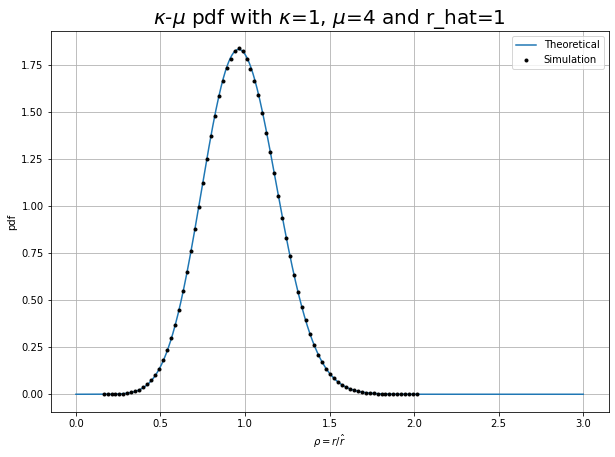

In [4]:
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) # instantiate KappaMu object
X = ku.X
Y = ku.Y
n = len(X)

# Plotting
print(f'====== {numSamples} kappa-mu samples succesfully generated! ======')
r = np.linspace(0, 3, 3000)# theoretical envelope PDF x axes
plt.figure(figsize=((10,7)))
plt.plot(r, ku._pdf(r), label='Theoretical')
plt.plot(ku.X, ku.Y, "k.", label='Simulation')
plt.title(r'$\kappa$-$\mu$ pdf with $\kappa$={}, $\mu$={} and r_hat={}'.format(kappa,mu,r_hat), fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho=r/\hat{r}$')
plt.ylabel('pdf')
plt.show()

In [5]:
## Auxiliary Methods
def computePDF(r, kappa, mu, r_hat):
  '''
  Function to calculate kappa-mu pdf.
  Equation extracted from:
  https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
  Eq. (1) with rho = R = r / r_hat
  '''

  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  R = r / r_hat
  B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  PDF = A * B * C / r_hat 
  return PDF

def fitness(x,y,z):
  '''
  Fitness function (MSE) to determine how good a given solution is.
  '''
  global X
  global Y
  y_pred = computePDF(X, x, y, z)
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return 1/cost

## Instantiate KappaMu object 
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) 
X = ku.X
Y = ku.Y
n = len(X)

## Set up directories
paths = ['plots', 
            'plots/gen2/', 
        ]
for i in paths:
    if not os.path.exists(i):
        os.makedirs(i)

=== Generation: 0 === 
Fitness: 20.119141709443596
Best individual:
Kappa: 2.111029673446326
Mu: 1.5139762495037505
R_hat: 1.0128350574835352



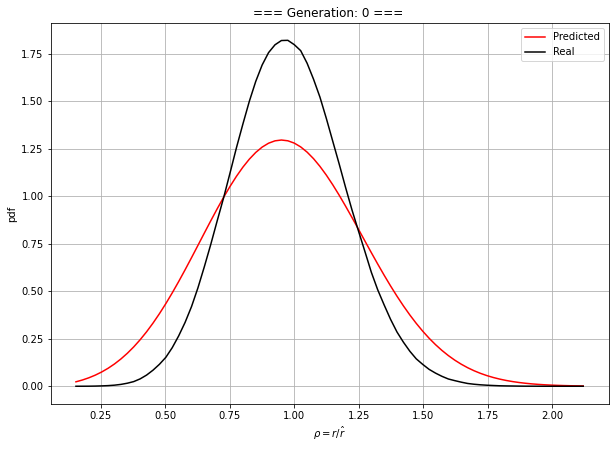

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 1 === 
Fitness: 31.853285359302248
Best individual:
Kappa: 1.4565015744738123
Mu: 3.4277009733940837
R_hat: 0.9339630664393926



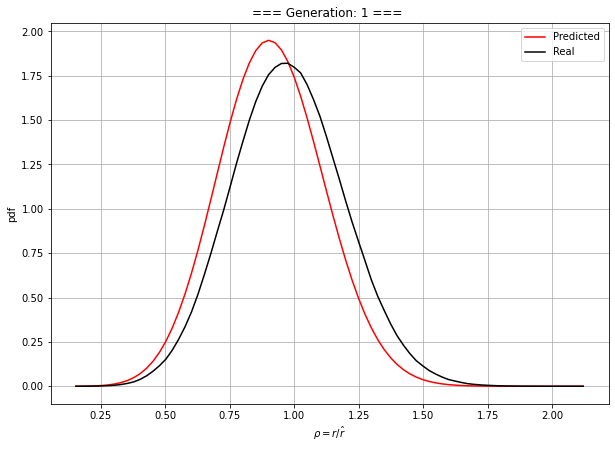

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 2 === 
Fitness: nan
Best individual:
Kappa: 5.8932832834701525
Mu: 4.947850858655919
R_hat: 0.17152930638045147



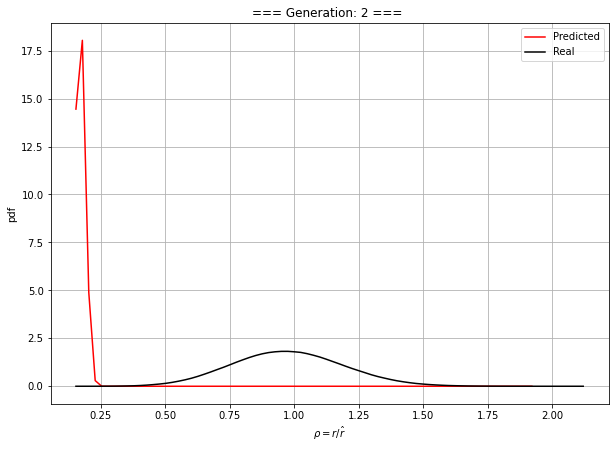

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 3 === 
Fitness: nan
Best individual:
Kappa: 8.77717970862182
Mu: 4.351621856792766
R_hat: 0.07614594344661332



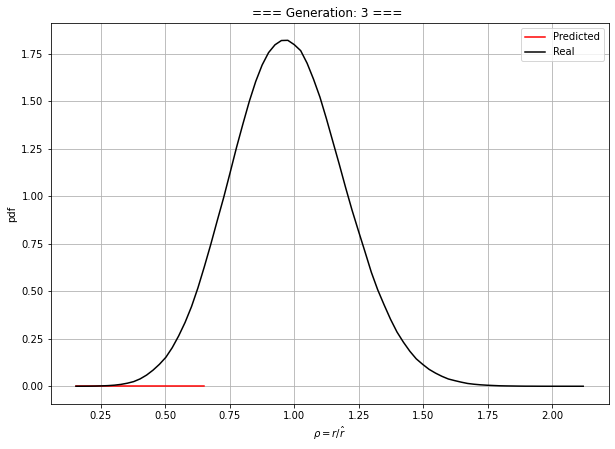

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 4 === 
Fitness: nan
Best individual:
Kappa: 8.245122939427146
Mu: 4.9076061239907505
R_hat: 0.07622241918117227



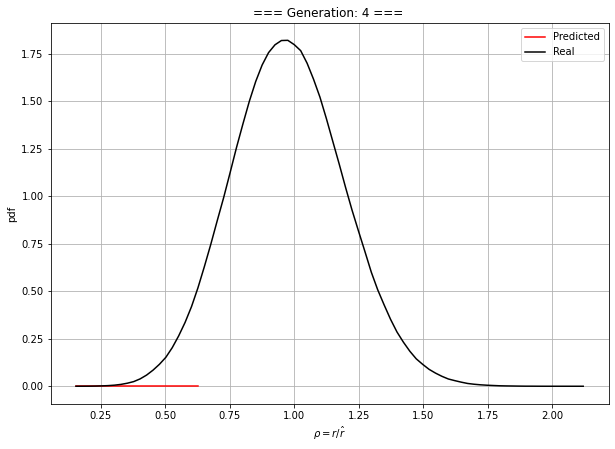

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 5 === 
Fitness: 64.46121285662029
Best individual:
Kappa: 5.291607260125408
Mu: 1.580575716954819
R_hat: 1.0443705961645855



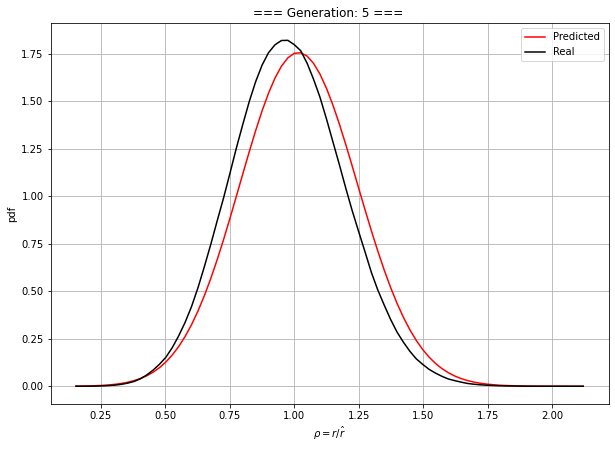

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 6 === 
Fitness: 147.2357677136117
Best individual:
Kappa: 1.5736700998886601
Mu: 3.086833053411251
R_hat: 1.0299972054156648



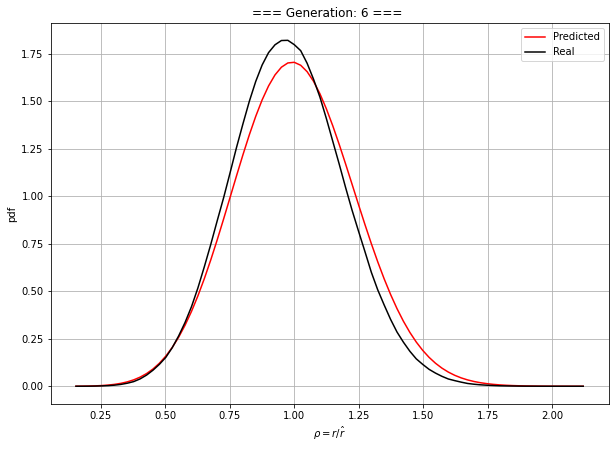

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 7 === 
Fitness: 133.67540875799668
Best individual:
Kappa: 1.0718290629267517
Mu: 3.290760215578077
R_hat: 1.0262397649646198



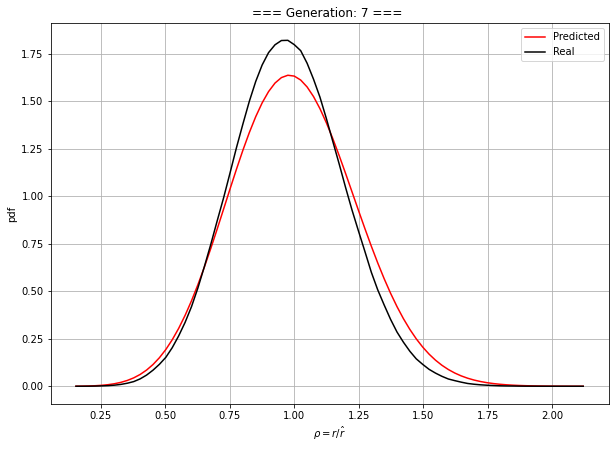

=== Generation: 8 === 
Fitness: 405.9758428526928
Best individual:
Kappa: 5.3380021772335855
Mu: 1.5757376516383577
R_hat: 1.0138993639359741



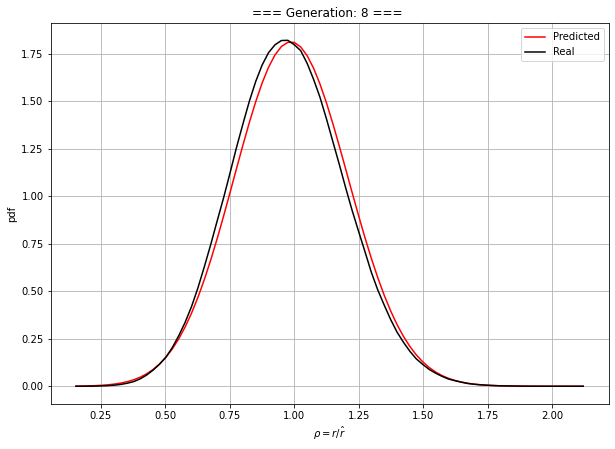

=== Generation: 9 === 
Fitness: 711.4017266606714
Best individual:
Kappa: 1.8267003710688128
Mu: 3.2969725462816695
R_hat: 1.0096240011657054



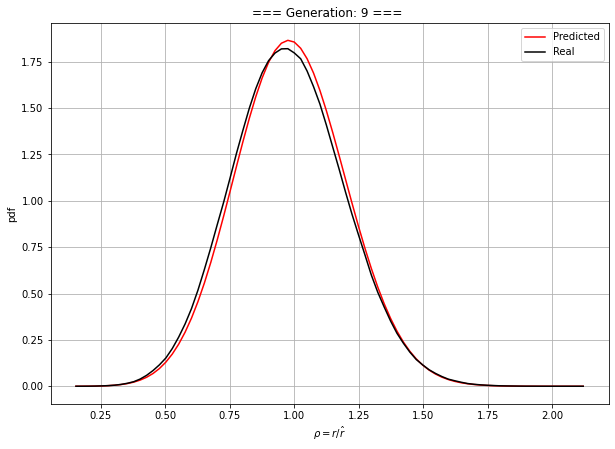

=== Generation: 10 === 
Fitness: 870.987965975462
Best individual:
Kappa: 1.0118658842574566
Mu: 3.6592253564764623
R_hat: 1.0070023085300877



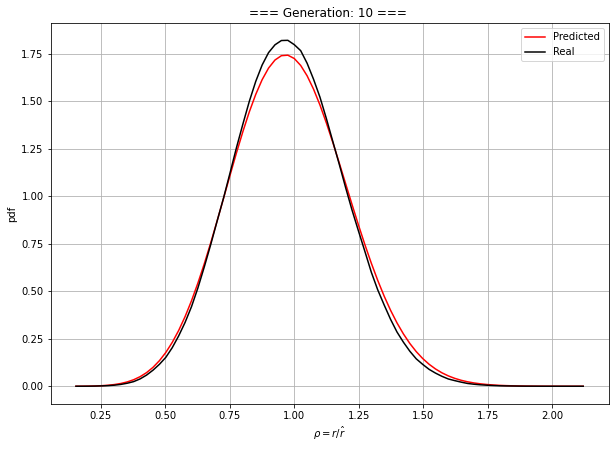

=== Generation: 11 === 
Fitness: 396.2606986460753
Best individual:
Kappa: 1.0325883404621328
Mu: 3.6928980864782095
R_hat: 1.0181394967929054



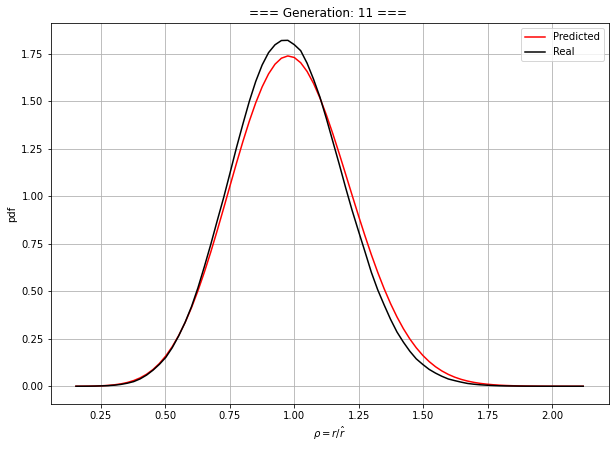

=== Generation: 12 === 
Fitness: 723.6152280884961
Best individual:
Kappa: 1.0477129032888473
Mu: 3.6589124666824397
R_hat: 1.0111666504646373



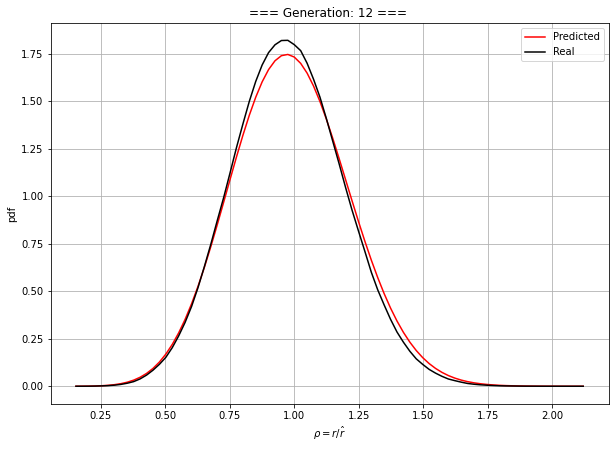

=== Generation: 13 === 
Fitness: 1064.9828193754702
Best individual:
Kappa: 1.0341068382770517
Mu: 3.6702625262057937
R_hat: 0.9942553371476531



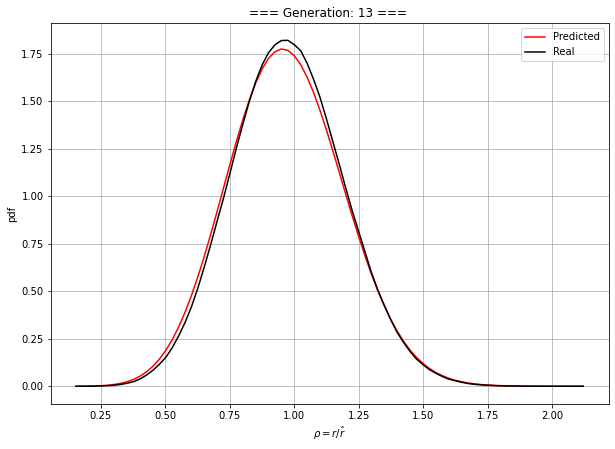

=== Generation: 14 === 
Fitness: 2797.8665950942495
Best individual:
Kappa: 1.031038841392596
Mu: 3.763058532894542
R_hat: 1.0033210589383725



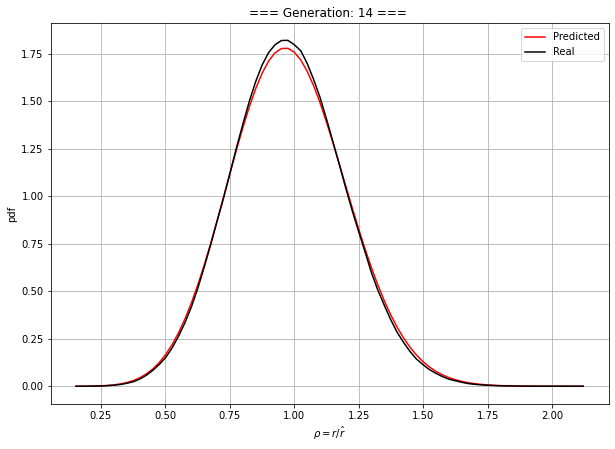

=== Generation: 15 === 
Fitness: 9408.401084444396
Best individual:
Kappa: 1.07832045980565
Mu: 3.7805886167815195
R_hat: 1.0000795314883373



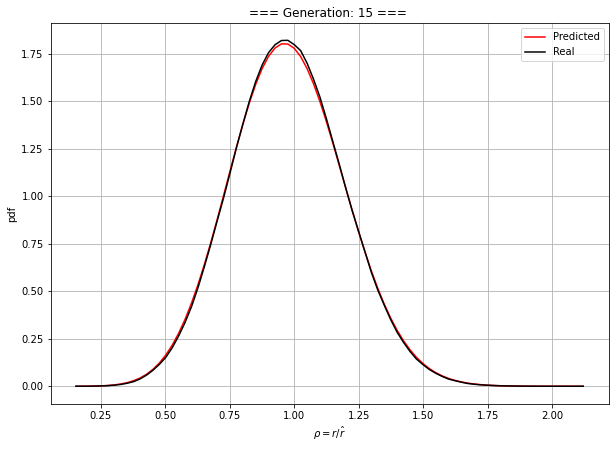

=== Generation: 16 === 
Fitness: 3771.8660696297875
Best individual:
Kappa: 1.0244250155515924
Mu: 3.7861177188580655
R_hat: 0.9995010433584246



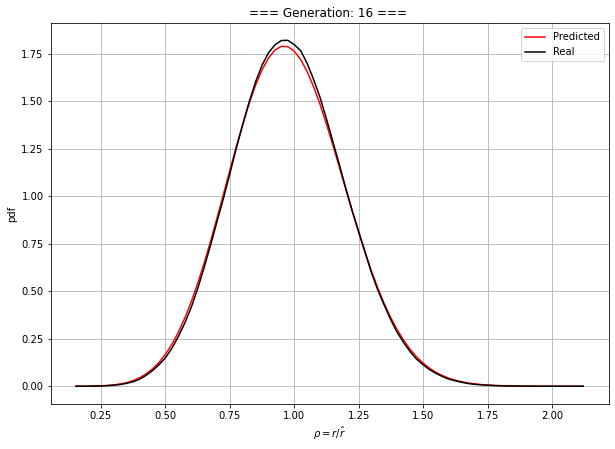

=== Generation: 17 === 
Fitness: 2482.05765009823
Best individual:
Kappa: 1.0164697663446736
Mu: 3.754410808301054
R_hat: 1.0001978411656993



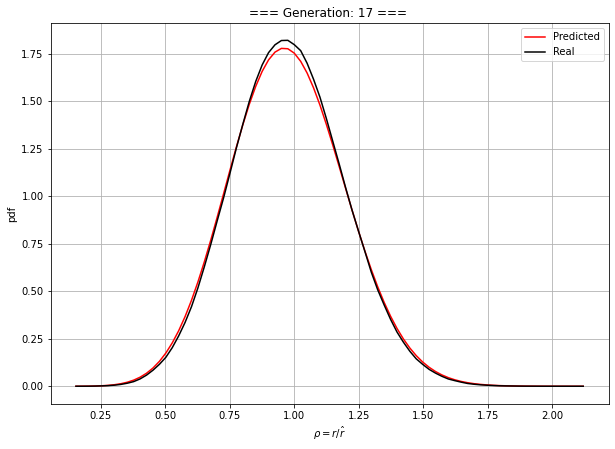

=== Generation: 18 === 
Fitness: 2589.4542736787166
Best individual:
Kappa: 1.0338232325617784
Mu: 3.7448033517320103
R_hat: 1.0025820959298364



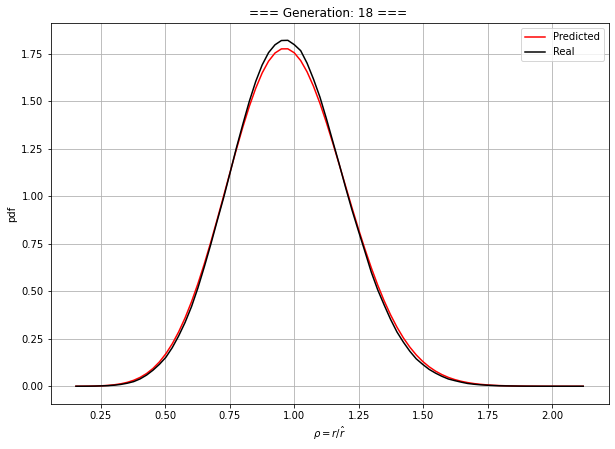

=== Generation: 19 === 
Fitness: 2109.0472330575367
Best individual:
Kappa: 1.0178279519364852
Mu: 4.184708263075564
R_hat: 1.0032411421892182



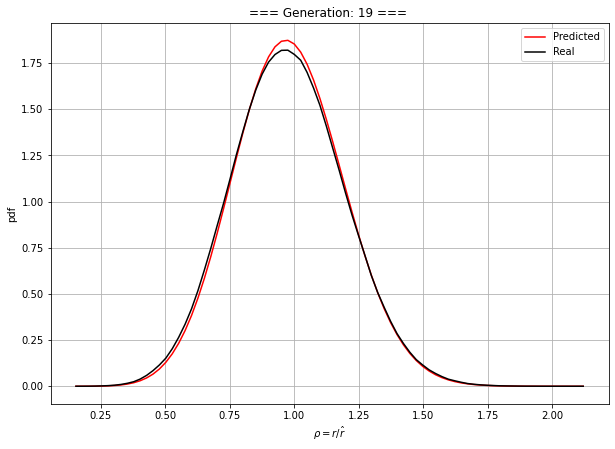

=== Generation: 20 === 
Fitness: 2736.4534589539116
Best individual:
Kappa: 0.9944499370339263
Mu: 3.7931387316393494
R_hat: 1.001660260169399



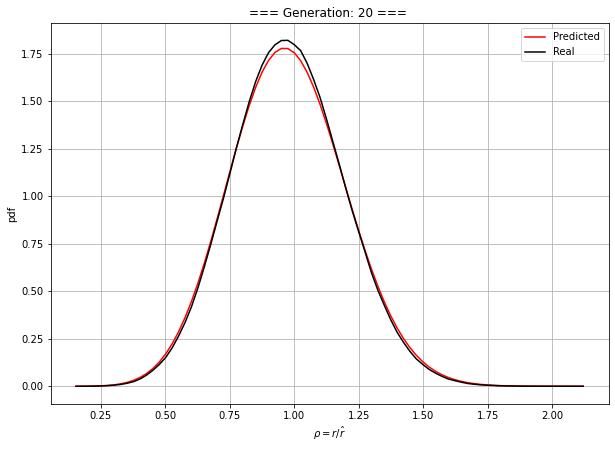

=== Generation: 21 === 
Fitness: 3551.5278266226665
Best individual:
Kappa: 1.0097729311683123
Mu: 3.7969575041824735
R_hat: 1.0008479932927001



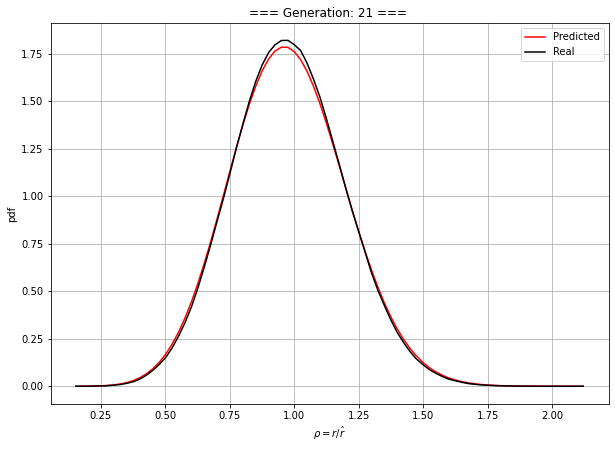

=== Generation: 22 === 
Fitness: 3264.925869072054
Best individual:
Kappa: 0.9988131119522611
Mu: 3.8164474512830378
R_hat: 0.9980716988598664



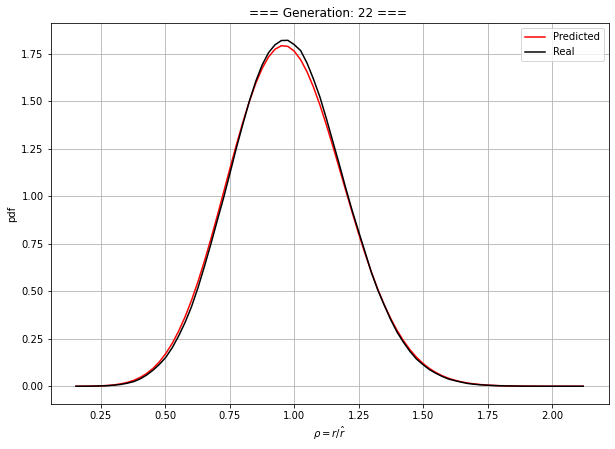

=== Generation: 23 === 
Fitness: 4073.762647986944
Best individual:
Kappa: 1.0015493623045657
Mu: 3.8583540446520566
R_hat: 0.9966904773329739



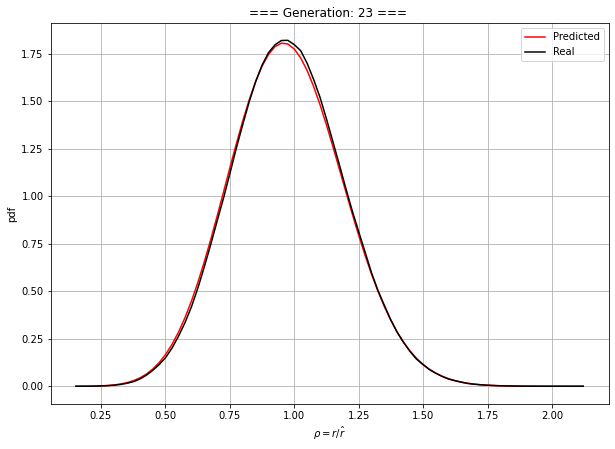

=== Generation: 24 === 
Fitness: 8691.104804145996
Best individual:
Kappa: 0.9980375163752004
Mu: 3.882490178252449
R_hat: 0.9992937688411287



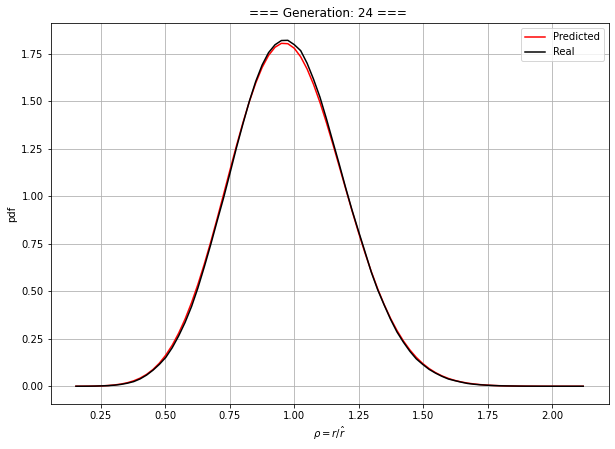

=== Generation: 25 === 
Fitness: 3973.4966490415973
Best individual:
Kappa: 0.9981214521571241
Mu: 3.8210835235128298
R_hat: 1.0007348930446818



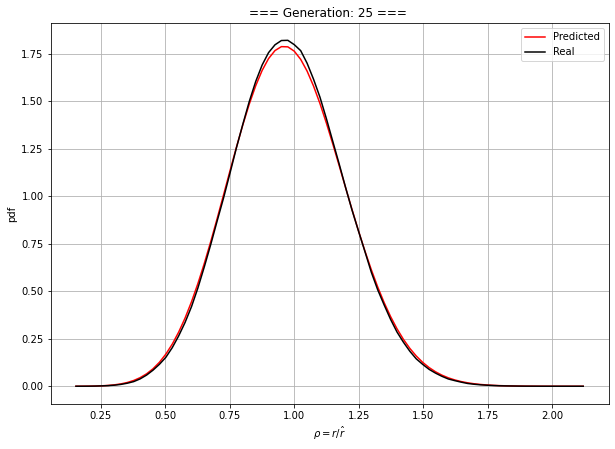

=== Generation: 26 === 
Fitness: 11233.80588139844
Best individual:
Kappa: 0.9909679798465048
Mu: 3.9054915284044944
R_hat: 0.9994444832183247



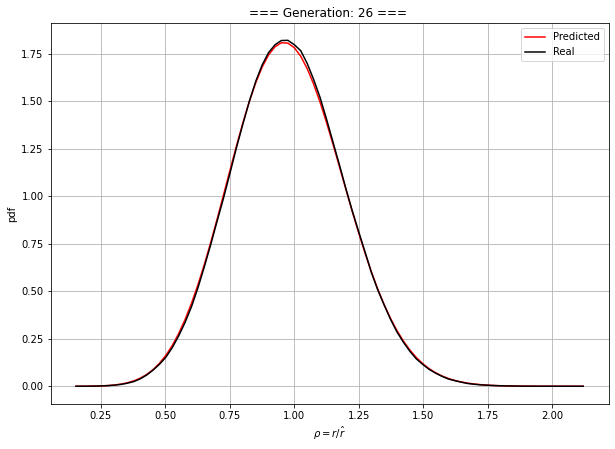

=== Generation: 27 === 
Fitness: 4813.52808639426
Best individual:
Kappa: 1.0188241583148494
Mu: 3.878428251582639
R_hat: 1.0051599226073238



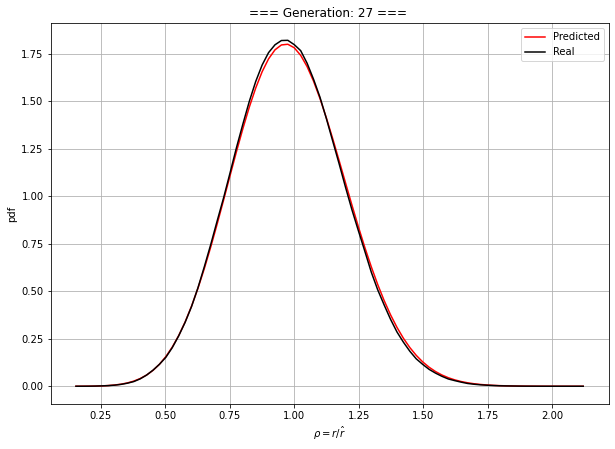

=== Generation: 28 === 
Fitness: 16314.109536128864
Best individual:
Kappa: 0.99614996378735
Mu: 3.911824601748235
R_hat: 1.001040734276663



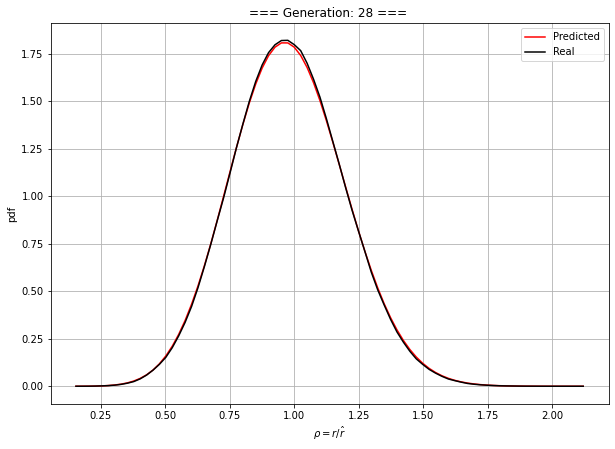

=== Generation: 29 === 
Fitness: 14767.440630271029
Best individual:
Kappa: 1.0244548497048593
Mu: 3.880692246106471
R_hat: 1.0019840770304667



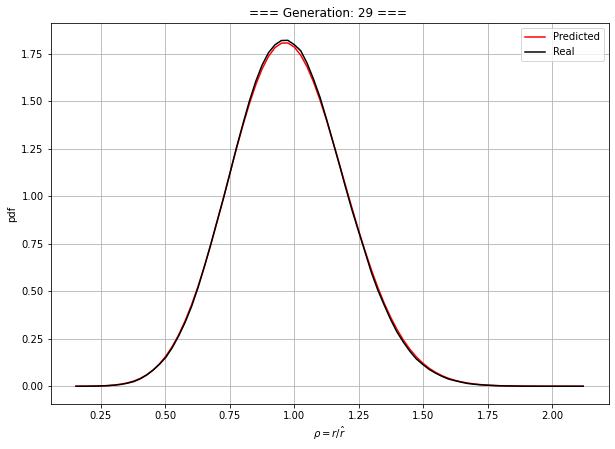

=== Generation: 30 === 
Fitness: 7609.171962542094
Best individual:
Kappa: 0.9911784656920856
Mu: 4.1079291678071375
R_hat: 1.002277794548909



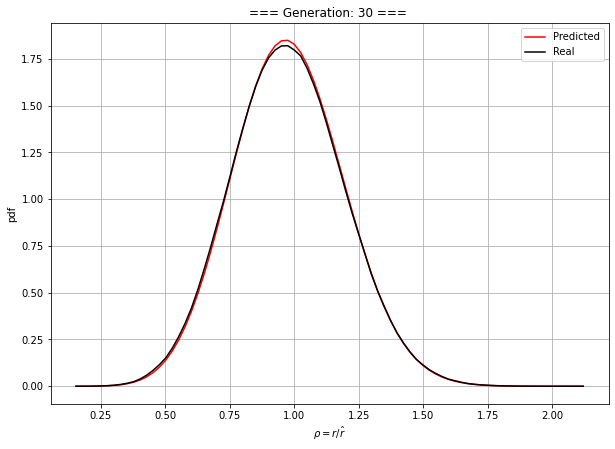

=== Generation: 31 === 
Fitness: 9922.142064429738
Best individual:
Kappa: 1.0073993447543768
Mu: 3.886156729741984
R_hat: 1.0024916141814908



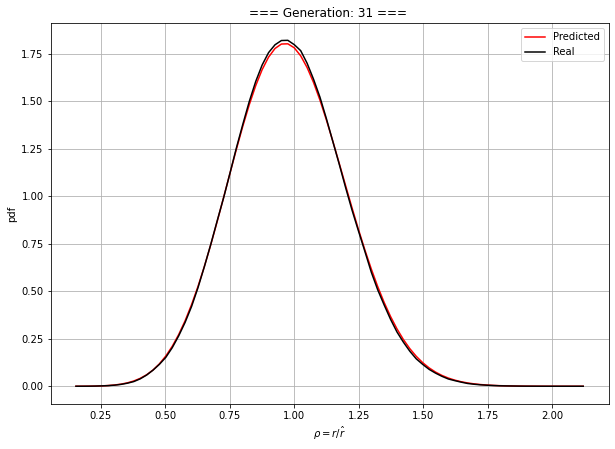

=== Generation: 32 === 
Fitness: 30422.67689332571
Best individual:
Kappa: 1.0144650603919025
Mu: 3.922841541238647
R_hat: 1.001732117689912



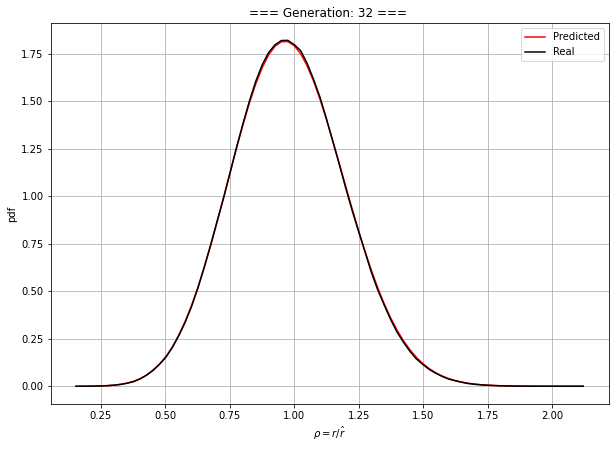

=== Generation: 33 === 
Fitness: 36080.649535313925
Best individual:
Kappa: 1.0138129855367755
Mu: 3.924005149700152
R_hat: 0.9997167357133458



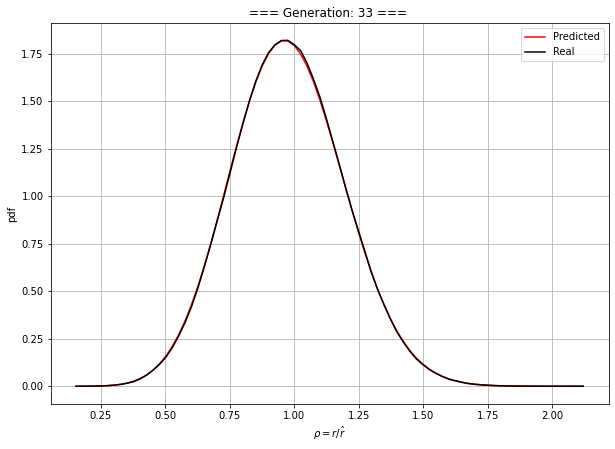

=== Generation: 34 === 
Fitness: 35213.29693039272
Best individual:
Kappa: 0.9969089593869582
Mu: 3.944050395139207
R_hat: 1.0013538099167922



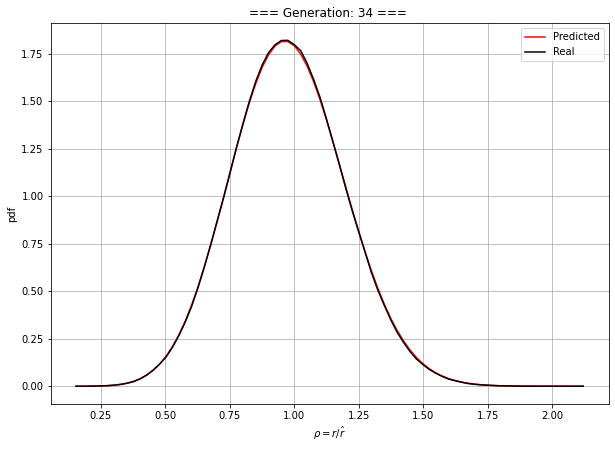

=== Generation: 35 === 
Fitness: 40953.84245719153
Best individual:
Kappa: 1.017843330211382
Mu: 3.920882172638256
R_hat: 1.0011772780753392



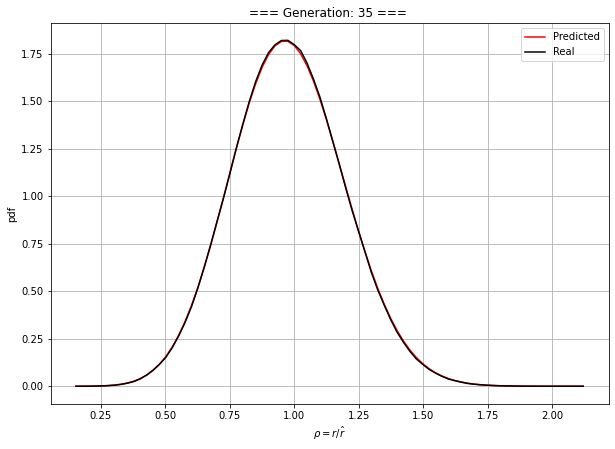

=== Generation: 36 === 
Fitness: 30380.365812278666
Best individual:
Kappa: 1.0047063733763308
Mu: 3.959405149190609
R_hat: 0.9987554373045052



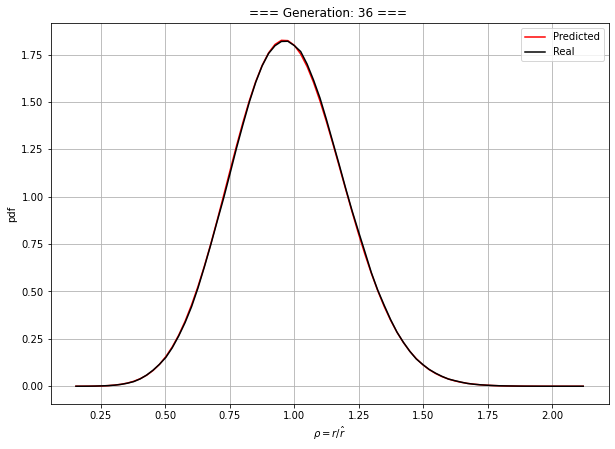

=== Generation: 37 === 
Fitness: 78656.49822278557
Best individual:
Kappa: 1.002686758784459
Mu: 3.958255201792683
R_hat: 1.0002483217422653



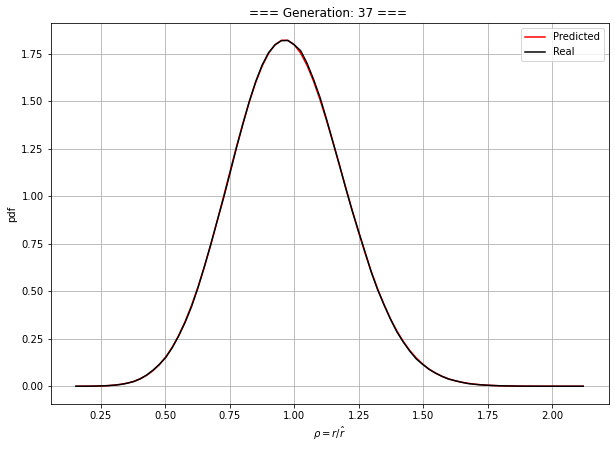

=== Generation: 38 === 
Fitness: 22532.549862378517
Best individual:
Kappa: 1.0121403292170768
Mu: 3.919739459420913
R_hat: 0.9990040064327732



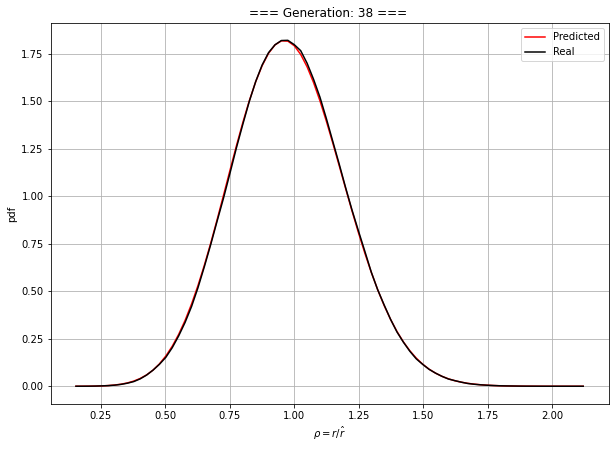

=== Generation: 39 === 
Fitness: 70110.36399591735
Best individual:
Kappa: 1.003309852537014
Mu: 3.9725996509518438
R_hat: 0.9996128188915325



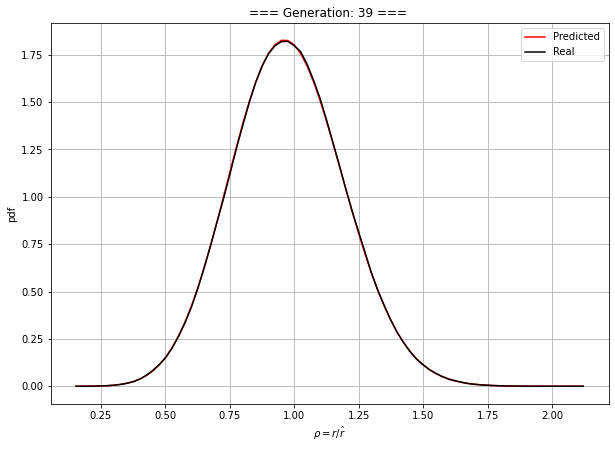

=== Generation: 40 === 
Fitness: 91523.0328186793
Best individual:
Kappa: 0.9805251628858012
Mu: 4.0284363932303195
R_hat: 1.0008034263529115



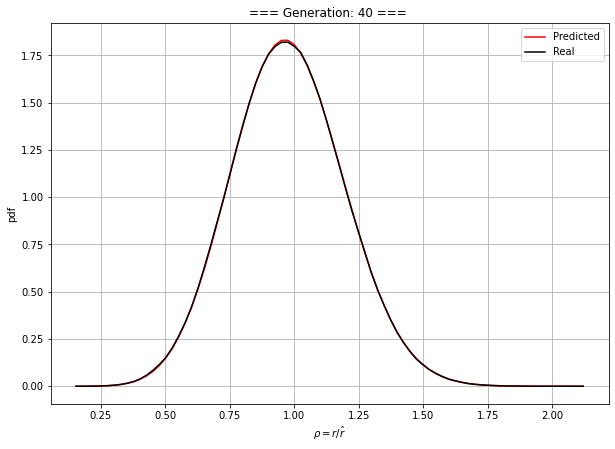

=== Generation: 41 === 
Fitness: 41157.2311431679
Best individual:
Kappa: 1.0015109594366418
Mu: 3.9559414177289796
R_hat: 1.001849514117499



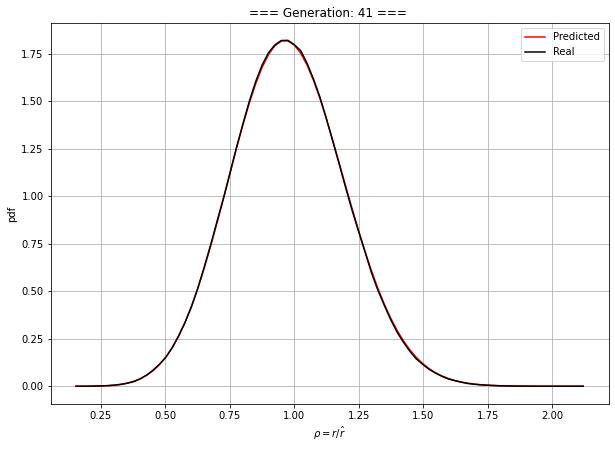

=== Generation: 42 === 
Fitness: 86399.35126930734
Best individual:
Kappa: 0.9956440737269723
Mu: 3.994269406272301
R_hat: 1.0013572332880933



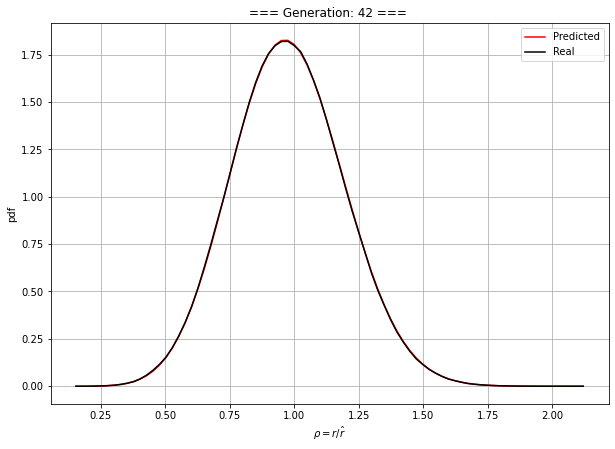

=== Generation: 43 === 
Fitness: 42784.0726040846
Best individual:
Kappa: 1.0032723318346166
Mu: 3.9585164277838865
R_hat: 1.0019065214387304



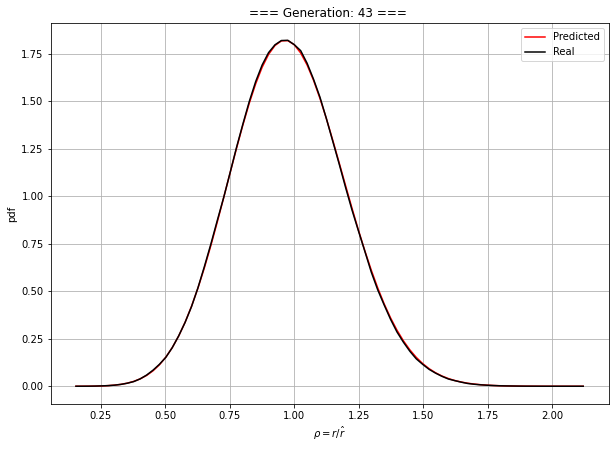

=== Generation: 44 === 
Fitness: 68643.34543338715
Best individual:
Kappa: 0.9954843544067714
Mu: 3.964112811512547
R_hat: 1.0009987300598229



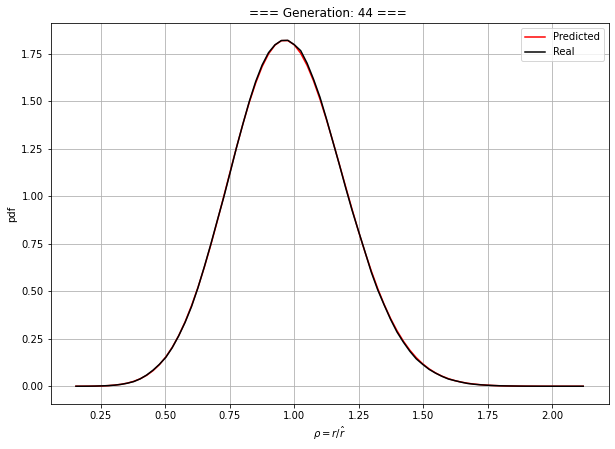

=== Generation: 45 === 
Fitness: 30768.1741988994
Best individual:
Kappa: 1.0024753278076486
Mu: 3.9365962121273435
R_hat: 1.0016600099043034



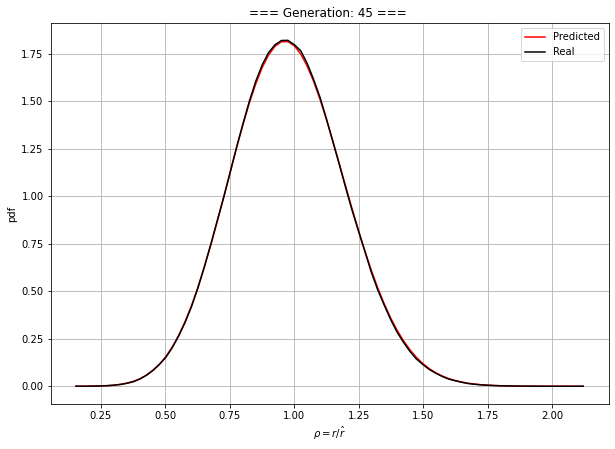

=== Generation: 46 === 
Fitness: 43583.322437950694
Best individual:
Kappa: 0.9870258273018255
Mu: 4.012507739707586
R_hat: 1.0020836253431784



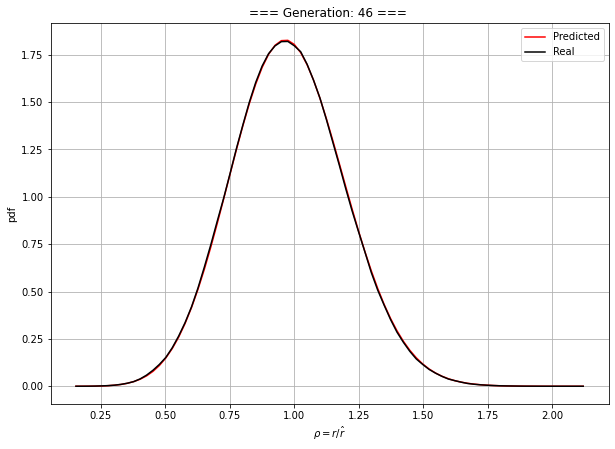

=== Generation: 47 === 
Fitness: 44316.11653560004
Best individual:
Kappa: 1.0093775923775805
Mu: 3.933580031606196
R_hat: 1.001123660039709



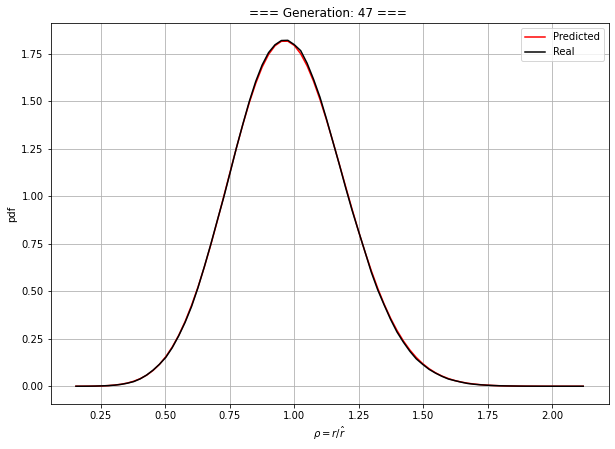

=== Generation: 48 === 
Fitness: 93695.21465651483
Best individual:
Kappa: 1.0003080906769635
Mu: 3.965165070452062
R_hat: 1.0005036078217702



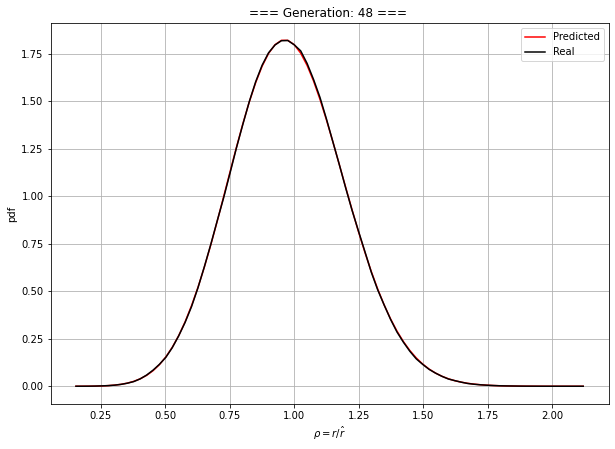

=== Generation: 49 === 
Fitness: 84581.4936562411
Best individual:
Kappa: 1.0042623971224724
Mu: 3.9664894656625265
R_hat: 1.0012446698464543



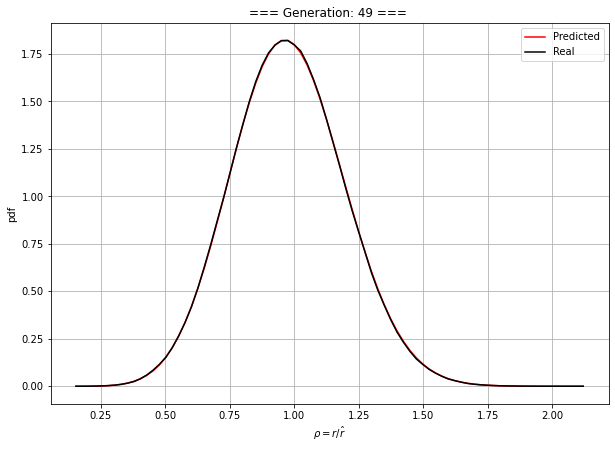

=== Generation: 50 === 
Fitness: 100700.53072995387
Best individual:
Kappa: 0.9974012330659523
Mu: 3.9997251817001667
R_hat: 1.0010106557528609



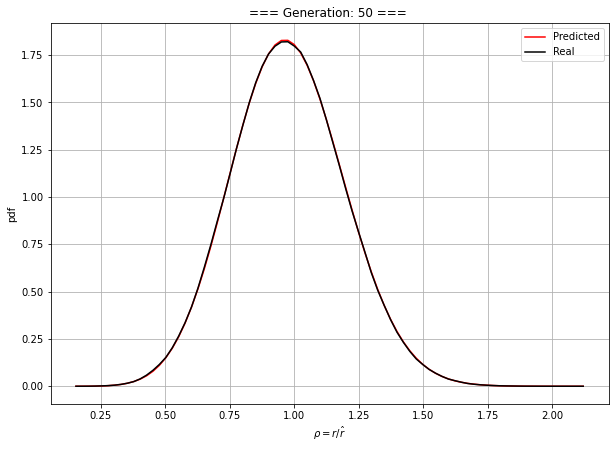

In [6]:
# Generate solutions (chromossomes)
solutions = []
for s in range(nPopulation):
  solutions.append((random.uniform(0.01, 10), # kappa
                      random.uniform(0.01, 10), # mu
                      random.uniform(1, 10))) # r_hat

for i in range(nGenerations):
  rankedSolutions = []	
  for s in solutions:
    rankedSolutions.append( (fitness(s[0],s[1],s[2]), s) )
  rankedSolutions.sort()
  rankedSolutions.reverse()
  
  print(f'=== Generation: {i} === ')
  print(f'Fitness: {rankedSolutions[0][0]}')
  print('Best individual:')
  print(f'Kappa: {rankedSolutions[0][1][0]}')
  print(f'Mu: {rankedSolutions[0][1][1]}')
  print(f'R_hat: {rankedSolutions[0][1][2]}\n')

  plt.figure(figsize=((10,7)))
  plt.plot(ku.X, computePDF(ku.X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), "r", label='Predicted')
  plt.plot(ku.X, ku.Y, "k", label='Real')
  plt.title(f'=== Generation: {i} === ')
  plt.legend()
  plt.grid(True)
  plt.xlabel(r'$\rho=r/\hat{r}$')
  plt.ylabel('pdf')
  if savePlots: 
    plt.savefig(f'plots/gen2/gen_{i}.png')
  
  if showPlots:
    plt.show()
  else: 
    plt.clf()

  # Stop Criterion: Fitness > 10.000
  if rankedSolutions[0][0] > 100000:
    break
  
  # Combine the best solutions and make a new solution of those combined solutions
  bestSolutions = rankedSolutions[:100]
  elements = [] 
  for s in bestSolutions:
    elements.append(s[1][0])
    elements.append(s[1][1])
    elements.append(s[1][2])

  newGen = []
  for _ in range(nPopulation):
    e1 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e2 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e3 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%

    newGen.append((e1,e2,e3))

  solutions = newGen